# Analiza skupień (klasteryzacja) - seminarium

## 1. Wstęp

Analiza skupień lub grupowanie (ang. _cluster analysis_, wprowadzony przez Tryon'a, 1939, na podstawie wcześniejszych prac) polega na grupowaniu zestawu obiektów w taki sposób, aby obiekty w tej samej grupie (zwane klastrami) były bardziej podobne (w pewnym sensie) do siebie niż do tych w innych grupach (klastrach). Jest to jedne z głównych narzędzi stosowane w tzw. drążeniu danych oraz powszechnie stosowana metoda analizy statystycznej. Analiza skupień znalazła zastosowanie w wielu dziedzinach nauki, m.in. w rozpoznawania wzorców, analizie obrazów, wyszukiwaniu informacji, bioinformatyce (analiza ekspresji genów), kompresji danych, grafice komputerowej i uczeniu maszynowym.  
Na analizę skupień składa się wiele różnych algorytmów (opublikowanych ponad 100 metod), które służą do rozwiązania zadania - znalezienia klastrów (centrów skupień). Pod pojęciem klastra rozumie się pewną grupę obiektów z małymi odległościami pomiędzy poszczególnymi obiektami, gęstymi obszarami przestrzeni danych, przedziałami lub poszczególnymi rozkładami statystycznymi.  
Dlatego zadanie grupowania można rozumieć jako problem optymalizacji wielu celów jednocześnie. Zastosowany algorytm grupowania i jego parametry (np. zastosowana funkcja odległości, próg gęstości lub liczba oczekiwanych klastrów) zależą od indywidualnego zestawu danych i zamierzonego wykorzystania wyników.  
Analiza skupień nie jest zadaniem automatycznym, ale procesem, który trzeba powtarzać wielokrotnie, za każdym razem modyfikując wstępne przetwarzanie danych i parametry modelu, aż wynik osiągnie pożądany cel.  

Obiektywnie rozpatrując metody analizy skupień nie istnieje jeden „poprawny” algorytmu grupowania, poroces klastrowania jest subiektywny i jego wynik zależy od osoby prowadzącej eksperymenty. Najodpowiedniejszy algorytm grupowania dla konkretnego problemu musi być wybierany eksperymentalnie, chyba że istnieją przesłanki matematyczne aby wybrać konkretną grupę modeli.

Algorytmy analizy skupień dzieli się na kilka podstawowych kategorii:  
 
 - metody hierarchiczne  
 - grupa metod k-średnich (metody centroidów)  
 - grupa metod opartych na dystrybucji
 - metody oparte na gęstości
 - modele oparte na siatkach
 - metody rozmytej analizy skupień

__Miary odległości:__  

- Odległość euklidesowa. Jeden z najczęściej stosowanych typów odległości. Okreslony jako odległość geometryczna w przestrzeni wielowymiarowej. Oblicza się ją wg wzoru:  
  $$  \|a-b\|_{2}={\sqrt  {\sum _{i}(a_{i}-b_{i})^{2}}}  $$  
  Odległości euklidesowe, a także kwadraty odległości euklidesowych są wyliczane w oparciu o dane nieprzetworzone, a nie na podstawie danych standaryzowanych (normalizowanych). Dlatego na odległości duży wpływ mają różnice jednostek między wymiarami. W przypadku dużych różnic pomiędzy wartościami zmiennych, dobrze jest stosować standaryzację tak by mieć dane o porównywalnej skali.  
- Kwadrat odległości euklidesowej. Odległość euklidesowa podniesiona do kwadratu. Przypisuje się większą wagę obiektom, które są bardziej oddalone. Oblicza się ją wg wzoru:  
  $$  {\|a-b\|_{2}}^{2}=\sum _{i}(a_{i}-b_{i})^{2}  $$  
- Odległość miejska (ang. _Manhattan distance_, _City block_). Suma różnicy mierzonych wzdłuż wymiarów. W większości przypadków miara ta daje podobne wyniki, jak odległość euklidesowa. W przypadku odległości miejskiej, wpływ pojedynczych dużych różnic (przypadków odstających) jest stłumiony. Odległość miejską oblicza się wg wzoru:  
  $$ \|a-b\|_{1}=\sum _{i}|a_{i}-b_{i}| $$  
- Odległość Czebyszewa (Maximum distance). Taka miara odległości jest stosowna w tych przypadkach, w których chcemy zdefiniować dwa obiekty jako "inne", wtedy gdy różnią się one w jednym dowolnym wymiarze. Jest specjalnym przypadkiem odległości Minkowskiego. Odległość Czebyszewa oblicza się następująco:  
  $$ \|a-b\|_{\infty }=\max _{i}|a_{i}-b_{i}| $$  
- Odległość Mahalanobisa – odległość między dwoma punktami w wielowymiarowej przestrzeni różnicująca wkład poszczególnych składowych współrzędnych punktów oraz wykorzystująca korelacje między nimi. Znajduje ona zastosowanie w statystyce, przy wyznaczaniu podobieństwa między nieznanym wektorem losowym a wektorem ze znanego zbioru.  
  $$ D = \sqrt {(a-b)^{T}S^{-1}(a-b)} $$  gdzie $S$ jest macierzą kowariancji 

### 1.1 Metody hierarchiczne  

W drążeniu danych i statystyce, metody hierarchiczne (ang. hierarchical cluster analysis, HCA) są jedną z metod analizy skupień, która próbuje znaleźć hierarchię klastrów. Celem jest grupowanie obiektów w coraz to większe zbiory (skupienia), z zastosowaniem pewnej miary podobieństwa lub odległości. Typowym wynikiem tego typu grupowania jest tzw. hierarchiczne drzewo. Ogólnie są stosowane dwie strategie grupowania:
- aglomeracja (tzw. metoda "bottom-up" - każda z obserwacji zaczyna z własnego klastra, który następnie jest rozbudowywany o kolejne obiekty, które są łączone w większe klastry, w miarę poruszania sie w górę hierarchii
- deglomeracja (tzw. metoda "top-down" - na początku wszystkie obserwacje są przypisane do jednego klastra, a podział następuje przy poruszaniu się w dół hierarchii

W przypadku metod aglomeracyjnych, na początku każdy obiekt reprezentuje pojedyncze skupienie, a odległości pomiędzu obiektami definiowane są przez wspomniane wyżej __miary odległości__. Jaką zasadę przyjąć w przypadku wiązania nowych obiektów podczas rozbudowywania (aglomeracji) skupisk? Które metody użyć do określenia podobieństwa dwóch skupień, aby móc je połączyć?  

__Metody łączenia lub wiązania:__

 - pojedynczego wiązania (ang. _single linkage_), wybieramy dwa najbliższe obiekty z dwóch skupień, łączymy skupienia jeśli wybrane obiekty znajdują się w mniejszej odległości niż odpowiednia odległość wiązania  
 - pełnego wiązania (ang. complete linkage), w tej metodzie wybieramy dwa najdalsze obiekty dwóch skupień  
 - średnich połączeń, UPGMA (ang. _unweighted pair-group method using arithmetic averages_), odległość między dwoma skupieniami jest obliczana jako średnia odległość między wszystkimi parami obiektów należących do dwóch różnych skupień  
 - średnich połączeń ważonych, WPGMA (ang. _weighted pair-group method using arithmetic averages_), łączenie przebiega identycznie z poprzednią metodą, z tym, że wprowadza się wagę skupień w postaci liczebności obiektów w skupieniu  
 - środków ciężkości, UPGMC (ang. _unweighted pair-group method using the centroid average_), w tej metodzie definiujemy punkty środkowe dwóch skupień i obliczamy różnicę odległości pomiędzy skupieniami  
 - ważonych środków ciężkości (mediany), WPGMC (ang. _weighted pair-group method using the centroid average_), metoda identyczna z poprzednią, z tym, że wprowadzono wagę dotyczącą liczebności obiektów w skupieniach
 - metoda Warda, wykorzystuje analizę wariancji do oszacowania odległości pomiędzy skupieniami, polega na minimalizacji sumy kwadratów odchyleń dowolnych dwóch skupień


### 1.2 Grupa metod opartych na centroidach (k-średnich, ang. _k-means_)  

W analizie skupień opartej na centroidach klastry są reprezentowane przez centralny wektor, który nie musi i często nie jest elementem klastra. W tej metodzie centroidy są wybierane w sposób losowy, a ich liczbę określa parametr _k_. Działanie algorytmu polega na znalezieniu _k_ centrów klastrów i przypisanie obiektów do najbliższego centrum klastrów. Optymalizacja przypisania jest jednocześnie zminimalizowaniem odległości od centroidów.  
Liczba rozwiązań problem wyboru centroidów i przypisania im obiektów jest funkcją wykładniczą możliwych kombinacji. Dlatego pojedyncza iteracja algorytmu "k-średnich" zwykle znajduje tylko lokalne minimum. Często algorytm jest uruchamiany wielokrotnie z różnymi losowymi parametrami inicjalizacji.  
Większość algorytmów typu k-średnich wymaga wcześniejszego określenia liczby klastrów - k - co jest uważane za jedną z największych wad tych algorytmów. Ponadto algorytmy preferują klastry o zbliżonej wielkości, ponieważ zawsze będą przypisywać obiekt do najbliższego środka ciężkości. Prowadzi to często do nieprawidłowo przyciętych granic klastrów (co nie jest zaskakujące, ponieważ algorytm optymalizuje centra klastrów, a nie granice klastrów).  

Odmiany algorytmu k-średnich obejmują optymalizacje, wyboru najlepszej iteracji, ograniczenie centroidów do elementów zbioru danych (k-medoidów), wybór median za centroidy (grupowanie k-medianów), wybranie początkowych centrów w sposób mniej losowo (k-mean++) lub rozmyte przypisanie klastra (fuzzy c-mean).


Metoda k-średnich posiada kilka interesujących właściwości. Po pierwsze, dzieli przestrzeń danych na strukturę znaną jako diagram Woronoja (etż tesselacja lub komórki, ang. _Voronoi diagram_). Diagram Woronoja dla przestrzeni dwuwymiarowej definiuje się w następujący sposób:  
dla danego zbioru _n_ punktów, dzieli się płaszczyznę na _n_ obszarów, w taki sposób, że każdy punkt w dowolnym obszarze znajduje się bliżej określonego punktu ze zbioru _n_ punktów, niż od pozostałych _n-1_ punktów.  
Po drugie, zasada działania algorytmu jest podobna do metody k-NN. Po trzecie, metodę k-średnich może być postrzegany jako odmiana analizy skupień opartej na modelu, a sam algorytm jako odmianę algorytmu maksymalizacji oczekiwań dla tego modelu. Po czwarte, wynikiem modelu jest przypisanie do poszczególnych skupień, bez określenia wewnętrznej struktury powiązań.

![Voronoi](img/Voronoi_diagram.svg)

Poniżej przedstawiono poszczególne kroki działania podstawowego algorytmu k-średnich:  
 - ustalenie liczby skupień - jest odgórnie - podawany jako parametr modelu (liczba _k_)
 - wybór centroidów skupień w sposób losowy
 - przypisanie obiektów do najbliższych centroidów - w ten sposób aby centroidy było najbliżej - miarą odległości między elementem a centroidą może być odległość euklidesowa, kwadrat odległości euklidesowej, odległość Czebyszewa lub inne
 - wyliczenie nowych centroidów skupień - najczęściej na podstawie współrzędnych stanowiących średnią arytmetyczną współrzędnych obiektów należących do tych skupień,
 - iteracyjne powtarzanie powtarzanie algorytmu aż do osiągnięcia kryterium zbieżności

### 1.3 Grupa metod opartych na dystrybucji  

Grupa modeli powiązanych ze statystycznymi metodami. W przypadku tych modeli obiekty w skupieniach (klastry) są powiązane z tą samą funkcją dystrybucji. Podejście to bardzo przypomina sposób generowania sztucznych zestawów danych: przez próbkowanie losowych obiektów z rozkładu.  
Kluczową wadą tego typu podejścia do klasteryzacji jest ich nadmierne dopasowanie, chyba że zostaną nałożone ograniczenia na złożoność modelu. Bardziej złożony model zazwyczaj będzie w stanie lepiej dopasować się do danych, co z natury utrudnia wybór odpowiedniej złożoności modelu.  
Jedna z wiodących metod należących do tej grupy algorytmów jest mieszanina rozkładów Gaussa (wykorzystująca algorytm maksymalizacji oczekiwań). W tym przypadku zestaw danych jest zwykle modelowany za pomocą stałej (aby uniknąć nadmiernego dopasowania) liczby rozkładów Gaussa, które są inicjowane losowo i których parametry są iteracyjnie optymalizowane w celu lepszego dopasowania do zestawu danych. Prowadzi to do osiągnięcia lokalnego optimum, dlatego każda kolejna iteracja może prowadzić do odmiennych wyników.  
Klasteryzacja oparta na dystrybucji prowadzi do utworzenia złozonych skupień, które mogą uchwycić korelację i zależność między atrybutami. Jednak algorytmy te stanowią dodatkowe obciążenie dla użytkownika: w przypadku wielu rzeczywistych zbiorów danych może nie istnieć ściśle zdefiniowany model matematyczny opisujący dane.

![GaussianMixtureMethod](img/gmm_plot1.png)

### 1.4 Grupa metod oparta na gęstości

W tej grupie metod skupienia są definiowane jako obszary o większej gęstości niż pozostała część zbioru danych. Obiekty w obszarach danych o małej gęstości - które są wymagane do oddzielenia skupień - są zwykle uważane za szumy i punkty graniczne.  
Najpopularniejszą metodą klasteryzacji opartą na gęstości jest DBSCAN. Klasteryzacja tą metodą polega na łączeniu punktów w określonych progach odległości. Łączone są jednak tylko punkty, które spełniają kryterium gęstości, w pierwotnym wariancie zdefiniowanym jako minimalna liczba innych obiektów w tym promieniu. Skupienie składa się ze wszystkich obiektów połączonych z gęstością (które mogą tworzyć klaster o dowolnym kształcie, w przeciwieństwie do wielu innych metod) oraz wszystkich obiektów, które znajdują się w zasięgu tych obiektów.  
Uogólnionym algorytem DBSCAN jest OPTICS, który eliminuje potrzebę wyboru odpowiedniej wartości parametru zakresu i daje wynik hierarchiczny związany z klasteryzacją połączeń.

Największą wadą algorytmów DBSCAN i OPTICS jest to, że oczekują spadku gęstości w celu wykrycia granic skupień. W danych, które zawierają np. nakładające się rozkłady Gaussa - sztucznie generowane dane - granice klastrów wytwarzane są niedopasowane, ponieważ gęstość klastrów stale maleje.

![DBSSCAN](img/dbscan_plot1.png)

### 1.5 Grupa metod opartych na siatkach (ang. _grid-based_) 

Techniki te stosuje się do klasteryzacji wielowymiarowych danych. Istnieją dwa rodzaje metod grupowania opartego na siatce: STING i CLIQUE.  
Algorytm działania można opisać w kilku krokach:  
 - podziel przestrzeń danych na skończoną liczbę komórek
 - losowo wybierz komórkę „c”
 - oblicz gęstość „c”
 - jeżeli gęstość „c” jest większa niż gęstość progowa oznacz komórkę „c” jako nowe skupienie
 - oblicz gęstość wszystkich sąsiadów „c”
 - jeżeli gęstość sąsiedniej komórki jest większa niż gęstość progowa, dodaj komórkę do klastra i powtarzaj kroki 2 i 3, aż nie będzie sąsiada o gęstości większej niż gęstość progowa
 - powtarzaj kroki 2, 3 i 4, aż wszystkie komórki zostaną przemierzone

### 1.6 Metody rozmytej analizy skupień (ang. _fuzzy clustering_)  
Najbardziej znaną jest metoda rozmytych c-średnich (ang. fuzzy c-means, FCM). Metody rozmytej analizy skupień mogą przydzielać element do więcej niż jednego klastra. Z tego powodu algorytmy rozmytej analizy skupień są stosowane w zadaniu kategoryzacji, czyli przydziału obiektów do jednej lub wielu kategorii. Metody rozmytej analizy skupień różnią się pod tym względem od metod klasycznej analizy skupień, w których uzyskana klasyfikacja ma charakter grupowania rozłącznego, którego wynikiem jest to, że każdy element należy do jednej i tylko jednej klasy.  

Podsumowanie graficzne (źródło scikit-learn.org)
![comparison](img/algos_comparison_plot1.png)

### 1.7 Miary jakości modeli

Ocena (lub „walidacja”) wyników grupowania jest równie trudnym zadaniem jak samo grupowanie. Metody oceny modeli można podzielic na:
- ocenę wewnętrzną, w której grupowanie jest podsumowane do pojedynczego wyniku jakościowego,
- ocenę zewnętrzną, w której grupowanie porównuje się z istniejącą klasyfikacją „prawdy gruntowej”
- ocenę ręczną przez eksperta 
- ocenę pośrednią - poprzez ocenę przydatności klastrowania w konkretnym zastosowaniu

W ramach wewnętrznej oceny występuje problem polegający na tym, że reprezentują one funkcje, które same w sobie mogą być postrzegane jako cel grupowania. Z kolei zewnętrzna ocena wiąże się z koniecznością posiadania etykiet klastrów, co sprowadzałoby się de facto do problemu klasyfikacyjnego i nie musielibyśmy grupować.  
Dlatego żadna z tych miar nie może ocenić rzeczywistej jakości grupowania, ale wymaga dodatkowej oceny człowieka, która z kolei jest wysoce subiektywna.

Ocena wewnętrzna  
Kiedy wynik klastrowania jest oceniany na podstawie danych, które zostały zgrupowane, jest to nazywane oceną wewnętrzną. Metody te zwykle przypisują najlepszy wynik algorytmowi, który wytwarza klastry o wysokim podobieństwie w klastrze i niskim podobieństwie między klastrami. Jedną z wad stosowania wewnętrznych kryteriów w ocenie klastrów jest to, że wysokie wyniki w ramach miary wewnętrznej niekoniecznie skutkują skutecznymi aplikacjami do wyszukiwania informacji. Ponadto ocena ta jest ukierunkowana na algorytmy korzystające z tego samego modelu klastra. Na przykład k-średnie skupianie naturalnie optymalizuje odległości między obiektami, a wewnętrzne kryterium oparte na odległości prawdopodobnie przeważy powstałe skupienie.  
W naszych przykładach zastosujemy popularną miarę tzw. __"metodę usypu"__ (ang. __elbow-method__) do określenia ilości klastrów w metodzie k-means oraz __współczynnik kofenetyczny__ (ang. __cophenetic factor__) w przypadku hierarchicznej analizy skupień.


### 1.8 Zastosowania  
 - wstępna analiza danych
 - eksploracja danych (ang. _data mining_)
 - wyszukiwanie informacji (ang. _information retrieval_)
 - segmentacja obrazu (ang. _image segmentation_)
 - grupowanie zadań w problemie harmonogramowania

### 1.9 Instalacja bibliotek  
W naszych przykłdach będziemy korzystać z bibliotek `scikit-learn`, `scipy`, `numpy`, `pandas`, `matplotlib`.  
Upewnijmy się, że mam zainstalowane pakiety w wirtualnym środowisku Python. Uruchom terminal, wpisz `source activate DataScience`, żeby aktywować środowisko wirtualne `DataScience`. Następnie wpisz:

`conda install scikit-learn scipy numpy pandas matplotlib`

In [117]:
# sprawdzenie wersji scikit-learn
import sklearn
print(sklearn.__version__)

0.21.3


## 2. Bazy danych

### 2.1 Cukrzyca

Dane pochodzą zostały zebrane przez dr John'a Schorling'a, z Wydziału Medycznego Uniwersytetu w Wirginii.

Dane obejmują 19 zmiennych od 403 pacjentów (z grupy 1046 osób), z którymi przeprowadzono wywiady, aby zrozumieć występowanie otyłości, cukrzycy i innych czynników ryzyka sercowo-naczyniowego w środkowej Wirginii wśród Afroamerykanów. Według dr Johna Honga cukrzyca typu 2 (cukrzyca dorosłych) jest najsilniej związana z otyłością. Ponadto cukrzyca typu 2 wiąże się z nadciśnieniem tętniczym - oba czynniki mogą być przyczyną tzw. „Syndromu X”.

__Zmienne__  

| Zmienna | Opis (jednostka) |
|:-:|:-:|
| id | nr pacjenta  |
| chol  | Cholesterol całkowity  |
| stab.glu  | Stężenie glukozy we krwi (na czczo) |
| hdl | Stężenie HDL  |
| ratio  | Proporcja chol/hdl  |
| glyhb  | Stężenie glikolowanej hemoglobiny |
| location  | Meijsce zamieszkania pacjentów (Buckingham,Louisa)  |
| age  | wiek (lata)  |
| gender  | płeć  |
| height  | wzrost (cale)  |
| weight  | masa ciała (funty)  |
| frame  | zmienna kategoryczna z poziomami (small,medium,large) |
| bp.1s  | Ciśn. skurczowe - pierwszy pomiar  |
| bp.1d  | Ciśn. rozkurczowe - pierwszy pomiar  |
| bp.2s  | Ciśn. skurczowe - drugi pomiar  |
| bp.2d  | Ciśn. rozkurczowe - drugi pomiar  |
| waist  | talia (cale)  |
| hip  | biodro (cale)  |
| time.ppn | Czas po posiłku, kiedy pobrano próbki |

__Bibliografia:__
1. Willems JP, Saunders JT, DE Hunt, JB Schorling: Prevalence of coronary heart disease risk factors among rural blacks: A community-based study. Southern Medical Journal 90:814-820; 1997
2. Schorling JB, Roach J, Siegel M, Baturka N, Hunt DE, Guterbock TM, Stewart HL: A trial of church-based smoking cessation interventions for rural African Americans. Preventive Medicine 26:92-101; 1997.

In [118]:
import pandas as pd
import numpy as np

In [119]:
my_data = pd.read_csv('Diabetes.csv', sep=',', index_col=0)

In [120]:
my_data.head()

,chol,stab.glu,hdl,ratio,glyhb,location,age,gender,height,weight,frame,bp.1s,bp.1d,bp.2s,bp.2d,waist,hip,time.ppn
id,,,,,,,,,,,,,,,,,,
1000,203.0,82,56.0,3.6,4.31,Buckingham,46,female,62.0,121.0,medium,118.0,59.0,NaN,NaN,29.0,38.0,720.0
1001,165.0,97,24.0,6.9,4.44,Buckingham,29,female,64.0,218.0,large,112.0,68.0,NaN,NaN,46.0,48.0,360.0
1002,228.0,92,37.0,6.2,4.64,Buckingham,58,female,61.0,256.0,large,190.0,92.0,185.0,92.0,49.0,57.0,180.0
1003,78.0,93,12.0,6.5,4.63,Buckingham,67,male,67.0,119.0,large,110.0,50.0,NaN,NaN,33.0,38.0,480.0
1005,249.0,90,28.0,8.9,7.72,Buckingham,64,male,68.0,183.0,medium,138.0,80.0,NaN,NaN,44.0,41.0,300.0


### 2.2 Mikroemulsje

Mikroemulsje to izotropowe, termodynamicznietrwałe, przezroczyste lub lekko opalizujące ciecze, w których jeden lub więcej tenzydów służy doprzeprowadzenia   znacznych   ilości   hydrofilowej   i   lipofilowej   fazy   w   układ   makroskopowojednofazowy.  
Liczne   zalety   mikroemulsji   wynikające   z   ich   fizycznych   właściwości,   zwłaszczaprzezroczystość i stabilność kwalifikują je w grupie postaci leku, które poprzez oddziaływanie ichformy mają wpływ na poprawę dostępności farmaceutycznej i biologicznej substancji leczniczej. Układy fizyczne o stopniu rozproszenia fazy wewnętrznej poniżej 140 nm znajdują zastosowaniejako nośniki substancji leczniczych, zwłaszcza trudno rozpuszczalnych w wodzie.  
![ME](img/me_img.jpg)

Mikroemulsja bezpośrednio po sporządzeniu.  
![ME_img](img/me_img2.jpg)

Obrazy mikroemulsji wykonane przy użyciu skaningowej mikroskopii elektronowej z zamrażaniem i łamaniem próbki (po lewej). Topologiczne przekształcenie obrazów wykonane przy użyciu programu ImageJ (po prawej).  
![ME_img3](img/me_img3.jpg)

W tabeli zgromadzono właściwości fizykochemiczne badanych układów mikroemulsyjnych, tj. pH, przewodnictwo, gęstość, lepkość, zmętnienie, współczynnik refrakcji, napięcie powierzchniowe. Do analizy włączono 18 formulacji mikroemulsji.

In [121]:
import pandas as pd
import numpy as np

In [122]:
my_data = pd.read_csv('dane_ME.csv', sep='\t', index_col=0)

In [123]:
my_data.head()

,pH,Przewodnictwo,Gestosc,Lepkosc,Zmetnienie,Wspolczynnik_refrakcji,Napiecie_powierzchniowe
Formulacja,,,,,,,
ME1a,5.79,47.77,0.9485,101.3,12.22,1.425,28.62
ME1b,5.68,14.43,0.9805,476.8,27.22,1.383,36.22
ME3a,4.73,41.93,0.9723,90.3,2.04,1.424,28.62
ME3b,5.45,25.90,0.9896,110.6,166.26,1.368,32.74
ME4a,5.39,112.63,0.9692,78.4,2.04,1.434,28.85


## 3. Analiza skupień - przykłady

### 3.1 Cukrzyca

In [124]:
my_data = pd.read_csv('Diabetes.csv', sep=',', index_col=0)

In [125]:
my_data.head()

,chol,stab.glu,hdl,ratio,glyhb,location,age,gender,height,weight,frame,bp.1s,bp.1d,bp.2s,bp.2d,waist,hip,time.ppn
id,,,,,,,,,,,,,,,,,,
1000,203.0,82,56.0,3.6,4.31,Buckingham,46,female,62.0,121.0,medium,118.0,59.0,NaN,NaN,29.0,38.0,720.0
1001,165.0,97,24.0,6.9,4.44,Buckingham,29,female,64.0,218.0,large,112.0,68.0,NaN,NaN,46.0,48.0,360.0
1002,228.0,92,37.0,6.2,4.64,Buckingham,58,female,61.0,256.0,large,190.0,92.0,185.0,92.0,49.0,57.0,180.0
1003,78.0,93,12.0,6.5,4.63,Buckingham,67,male,67.0,119.0,large,110.0,50.0,NaN,NaN,33.0,38.0,480.0
1005,249.0,90,28.0,8.9,7.72,Buckingham,64,male,68.0,183.0,medium,138.0,80.0,NaN,NaN,44.0,41.0,300.0


In [126]:
my_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 403 entries, 1000 to 41756
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   chol      402 non-null    float64
 1   stab.glu  403 non-null    int64  
 2   hdl       402 non-null    float64
 3   ratio     402 non-null    float64
 4   glyhb     390 non-null    float64
 5   location  403 non-null    object 
 6   age       403 non-null    int64  
 7   gender    403 non-null    object 
 8   height    398 non-null    float64
 9   weight    402 non-null    float64
 10  frame     391 non-null    object 
 11  bp.1s     398 non-null    float64
 12  bp.1d     398 non-null    float64
 13  bp.2s     141 non-null    float64
 14  bp.2d     141 non-null    float64
 15  waist     401 non-null    float64
 16  hip       401 non-null    float64
 17  time.ppn  400 non-null    float64
dtypes: float64(13), int64(2), object(3)
memory usage: 59.8+ KB


In [127]:
my_data_pp1 = my_data.drop(['bp.2s','bp.2d'],axis = 1)

In [128]:
my_data_pp1.isnull().any(axis=1)

id
1000     False
1001     False
1002     False
1003     False
1005     False
         ...  
41506    False
41507    False
41510    False
41752    False
41756     True
Length: 403, dtype: bool

In [129]:
to_drop = [i for i, x in enumerate(my_data_pp1.isnull().any(axis=1)) if x == True]

In [130]:
to_drop

[7,
 13,
 27,
 37,
 43,
 50,
 59,
 63,
 64,
 69,
 86,
 108,
 109,
 110,
 116,
 117,
 152,
 161,
 192,
 195,
 215,
 217,
 224,
 231,
 271,
 273,
 282,
 317,
 326,
 327,
 332,
 336,
 348,
 380,
 393,
 396,
 402]

In [131]:
my_data_pp2 = my_data_pp1.drop(my_data_pp1.index[to_drop])

In [132]:
my_data.shape

(403, 18)

In [133]:
my_data_pp2.shape

(366, 16)

In [134]:
my_data_pp1.shape

(403, 16)

In [135]:
my_data_pp2.head()

,chol,stab.glu,hdl,ratio,glyhb,location,age,gender,height,weight,frame,bp.1s,bp.1d,waist,hip,time.ppn
id,,,,,,,,,,,,,,,,
1000,203.0,82,56.0,3.6,4.31,Buckingham,46,female,62.0,121.0,medium,118.0,59.0,29.0,38.0,720.0
1001,165.0,97,24.0,6.9,4.44,Buckingham,29,female,64.0,218.0,large,112.0,68.0,46.0,48.0,360.0
1002,228.0,92,37.0,6.2,4.64,Buckingham,58,female,61.0,256.0,large,190.0,92.0,49.0,57.0,180.0
1003,78.0,93,12.0,6.5,4.63,Buckingham,67,male,67.0,119.0,large,110.0,50.0,33.0,38.0,480.0
1005,249.0,90,28.0,8.9,7.72,Buckingham,64,male,68.0,183.0,medium,138.0,80.0,44.0,41.0,300.0


In [136]:
my_data_pp2.location = pd.Categorical(my_data_pp2.location)
my_data_pp2.gender = pd.Categorical(my_data_pp2.gender)
my_data_pp2.frame = pd.Categorical(my_data_pp2.frame)

In [137]:
my_data_pp2['location_code'] = my_data_pp2.location.cat.codes
my_data_pp2['gender_code'] = my_data_pp2.gender.cat.codes
my_data_pp2['frame_code'] = my_data_pp2.frame.cat.codes

In [138]:
my_data_pp2.head()

,chol,stab.glu,hdl,ratio,glyhb,location,age,gender,height,weight,frame,bp.1s,bp.1d,waist,hip,time.ppn,location_code,gender_code,frame_code
id,,,,,,,,,,,,,,,,,,,
1000,203.0,82,56.0,3.6,4.31,Buckingham,46,female,62.0,121.0,medium,118.0,59.0,29.0,38.0,720.0,0,0,1
1001,165.0,97,24.0,6.9,4.44,Buckingham,29,female,64.0,218.0,large,112.0,68.0,46.0,48.0,360.0,0,0,0
1002,228.0,92,37.0,6.2,4.64,Buckingham,58,female,61.0,256.0,large,190.0,92.0,49.0,57.0,180.0,0,0,0
1003,78.0,93,12.0,6.5,4.63,Buckingham,67,male,67.0,119.0,large,110.0,50.0,33.0,38.0,480.0,0,1,0
1005,249.0,90,28.0,8.9,7.72,Buckingham,64,male,68.0,183.0,medium,138.0,80.0,44.0,41.0,300.0,0,1,1


In [139]:
labels_to_drop = ['location','gender','frame']
my_data_pp3 = my_data_pp2.drop(labels_to_drop,axis=1)

In [140]:
my_data_pp3.shape

(366, 16)

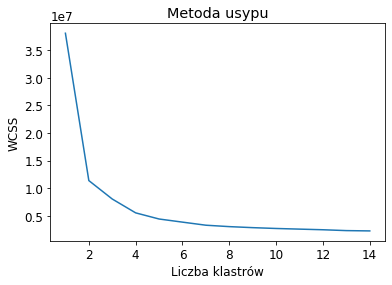

In [141]:
# analiza k-średnich
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(my_data_pp3)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 15), wcss)
plt.title('Metoda usypu')
plt.xlabel('Liczba klastrów')
plt.ylabel('WCSS') # Within-Cluster Sum of Squared Error - suma kwadratów błędów wewnątrz klastra
plt.show()

Text(0.5, 0, 'bp.1s')

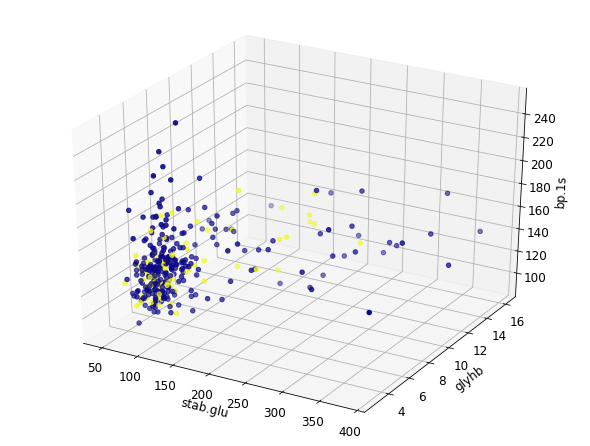

In [142]:
# analiza k-średnich
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
# zdefiniowanie modelu
model = KMeans(n_clusters=2)
# dopasowanie modelu
model.fit(my_data_pp3)
# przypisanie centrów danym
yhat = model.predict(my_data_pp3)

# graficzne przedstawienie
fig = plt.figure(figsize=(8, 6))
ax = Axes3D(fig)
ax.scatter(my_data_pp3.iloc[:,1:2],
           my_data_pp3.iloc[:,4:5],
           my_data_pp3.iloc[:,8:9],
           c=yhat,
           cmap='plasma'
          )
ax.set_xlabel(my_data_pp3.columns[1])
ax.set_ylabel(my_data_pp3.columns[4])
ax.set_zlabel(my_data_pp3.columns[8])

In [143]:
from itertools import combinations
cols = list(my_data_pp3.columns)

In [144]:
my_3d_list = np.array([items for items in combinations(cols, r=3)])

In [145]:
my_3d_list.shape

(560, 3)

In [146]:
my_3d_list[0:10]

array([['chol', 'stab.glu', 'hdl'],
       ['chol', 'stab.glu', 'ratio'],
       ['chol', 'stab.glu', 'glyhb'],
       ['chol', 'stab.glu', 'age'],
       ['chol', 'stab.glu', 'height'],
       ['chol', 'stab.glu', 'weight'],
       ['chol', 'stab.glu', 'bp.1s'],
       ['chol', 'stab.glu', 'bp.1d'],
       ['chol', 'stab.glu', 'waist'],
       ['chol', 'stab.glu', 'hip']], dtype='<U13')

Text(0.5, 0, 'bp.1s')

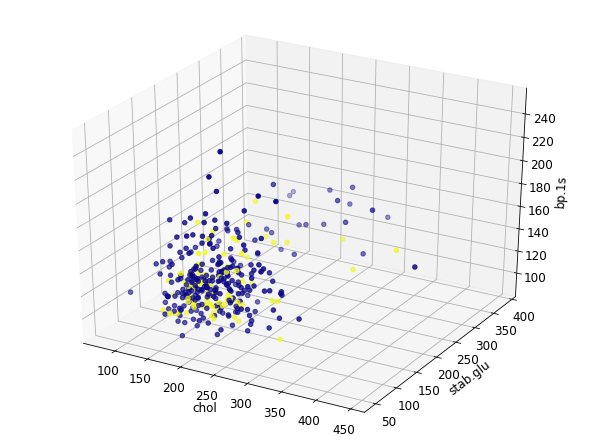

In [147]:
# create scatter plot for samples from each cluster
fig = plt.figure(figsize=(8, 6))
ax = Axes3D(fig)
ax.scatter(my_data_pp3.loc[: , my_3d_list[6][0]],
           my_data_pp3.loc[: , my_3d_list[6][1]],
           my_data_pp3.loc[: , my_3d_list[6][2]],
           c=yhat,
           cmap='plasma')
ax.set_xlabel(my_3d_list[6][0])
ax.set_ylabel(my_3d_list[6][1])
ax.set_zlabel(my_3d_list[6][2])

In [148]:
range(my_3d_list.shape[0])

range(0, 560)

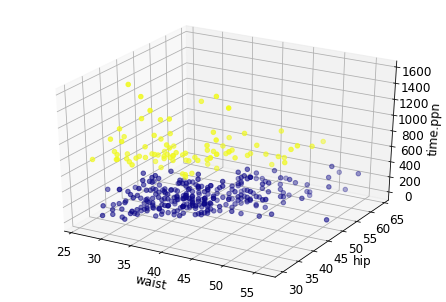

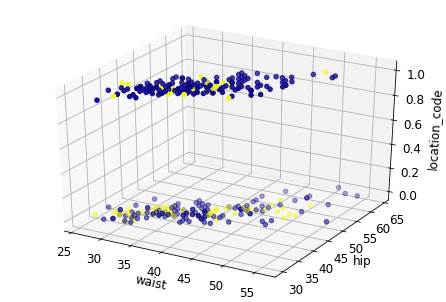

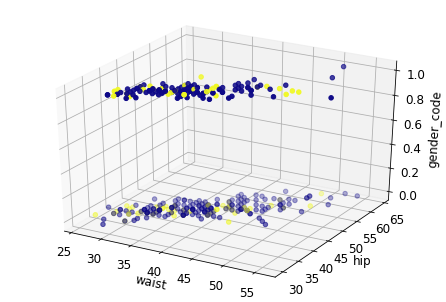

In [ ]:
plt.rc('figure', max_open_warning = 0)
# wstaw `range(my_3d_list.shape[0])` aby wyswietlic wszystkie wykresy
for i in range(540,545):   
    # create scatter plot for samples from each cluster
    fig = plt.figure(figsize=(6, 4))
    ax = Axes3D(fig)
    ax.scatter(my_data_pp3.loc[: , my_3d_list[i][0]],
               my_data_pp3.loc[: , my_3d_list[i][1]],
               my_data_pp3.loc[: , my_3d_list[i][2]],
               c=yhat,
               cmap='plasma')
    ax.set_xlabel(my_3d_list[i][0])
    ax.set_ylabel(my_3d_list[i][1])
    ax.set_zlabel(my_3d_list[i][2])

__Zacznijmy jeszcze raz (sic!).__
Tym razem będziemy starali sie udowodnić hipotezę: _istnieje grupa pacjentów u których można wykazać występowanie tzw. zespołu X_ - czyli zbioru wzajemnie powiązanych czynników zwiększających istotnie ryzyko rozwoju miażdżycy i cukrzycy typu 2 oraz ich powikłań sercowo-naczyniowych.

In [ ]:
my_data_pp3.columns

In [ ]:
my_data_pp4 = my_data_pp3[['chol', 'glyhb','bp.1s']]

In [ ]:
my_data_pp4.head()

In [ ]:
# wh_ratio = pd.DataFrame(data=my_data_pp3['waist']/my_data_pp3['hip'],columns=['wh_ratio'])

In [ ]:
# my_data_pp4 = pd.concat([wh_ratio, my_data_pp3[['glyhb','bp.1s']]],axis=1)

In [ ]:
# my_data_pp4

In [ ]:
# analiza k-średnich
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(my_data_pp4)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 15), wcss)
plt.title('Metoda usypu')
plt.xlabel('Liczba klastrów')
plt.ylabel('WCSS')
plt.show()

In [ ]:
# analiza k-średnich
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
# zdefiniowanie modelu
model = KMeans(n_clusters=3)
# dopasowanie modelu
model.fit(my_data_pp4)
# przypisanie centrów danym
yhat = model.predict(my_data_pp4)

# graficzne przedstawienie
fig = plt.figure(figsize=(8, 6))
ax = Axes3D(fig)
ax.scatter(my_data_pp4.iloc[:,0:1],
           my_data_pp4.iloc[:,1:2],
           my_data_pp4.iloc[:,2:3],
           c=yhat,
           cmap='plasma'
          )
ax.set_xlabel(my_data_pp4.columns[0])
ax.set_ylabel(my_data_pp4.columns[1])
ax.set_zlabel(my_data_pp4.columns[2])

In [ ]:
centers = pd.DataFrame(model.cluster_centers_, columns = ['chol', 'glyhb','bp.1s'])
centers

Wniosek z tego rozważania płynie taki, że analiza skupień nadaje się na potwierdzanie hipotez. Pod warunkiem, że wiemy czego szukać.

### 3.2 Mikroemulsje

In [ ]:
my_data = pd.read_csv('dane_ME.csv', sep='\t', index_col=0)

In [ ]:
my_data.head()

In [ ]:
from itertools import combinations
cols = list(my_data.columns)
cols

In [ ]:
my_comb_list = np.array([items for items in combinations(cols, r=2)])
my_comb_list

In [ ]:
my_comb_list.shape[0]

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(6,4, figsize=(24,32), squeeze = False)

plt.rcParams.update({'font.size': 12})

for i in range(my_comb_list.shape[0]):
    tmp_data = pd.concat([my_data[my_comb_list[i][0]], my_data[my_comb_list[i][1]]], axis = 1)
    plt.subplot(7,3,i+1)
    plt.subplots_adjust(hspace = 0.2, wspace=0.2)
    plt.scatter(tmp_data.iloc[:,0], tmp_data.iloc[:,1])
    plt.xlabel(tmp_data.columns[0])
    plt.ylabel(tmp_data.columns[1])


In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

# generate the linkage matrix
Z = linkage(my_data, method='centroid',metric='euclidean')


In [ ]:
Z

In [ ]:
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

c, coph_dists = cophenet(Z, pdist(my_data))
c

In [ ]:
# calculate full dendrogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    labels=my_data.index,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=12.,  # font size for the x axis labels
    color_threshold=100
)
plt.show()

In [ ]:
from scipy.cluster.hierarchy import fcluster
max_d = 100
clusters = fcluster(Z, max_d, criterion='distance')
clusters


In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(6,4, figsize=(24,32), squeeze = False)

plt.rcParams.update({'font.size': 12})

for i in range(my_comb_list.shape[0]):
    tmp_data = pd.concat([my_data[my_comb_list[i][0]], my_data[my_comb_list[i][1]]], axis = 1)
    plt.subplot(7,3,i+1)
    plt.subplots_adjust(hspace = 0.2, wspace=0.2)
    plt.scatter(tmp_data.iloc[:,0], tmp_data.iloc[:,1], c=clusters, cmap='plasma')
    plt.xlabel(tmp_data.columns[0])
    plt.ylabel(tmp_data.columns[1])


Tak jak poprzednio. Sprawdźmy pewną hipotezę dotyczącą typu otrzymanych mikroemulsji...

In [ ]:
my_data2 = my_data[['Przewodnictwo','Lepkosc']]

In [ ]:
my_data2.head()

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(my_data2.iloc[:,0], my_data2.iloc[:,1])
plt.xlabel(my_data2.columns[0])
plt.ylabel(my_data2.columns[1])


In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

# generate the linkage matrix
Z = linkage(my_data2, method='centroid',metric='euclidean')

Z

In [ ]:
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

c, coph_dists = cophenet(Z, pdist(my_data))
c

In [ ]:
# calculate full dendrogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    labels=my_data2.index,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=12.,  # font size for the x axis labels
    color_threshold=100
)
plt.show()

In [ ]:
from scipy.cluster.hierarchy import fcluster
max_d = 100
clusters = fcluster(Z, max_d, criterion='distance')
clusters


In [ ]:
plt.scatter(my_data2.iloc[:,0], my_data2.iloc[:,1], c=clusters, cmap='plasma')
plt.xlabel(my_data2.columns[0])
plt.ylabel(my_data2.columns[1])

for i, txt in enumerate(list(my_data2.index)):
    plt.annotate(txt, (my_data2.iloc[i, 0], my_data2.iloc[i , 1]))

In [ ]:
# affinity propagation clustering
from numpy import unique
from numpy import where
from sklearn.cluster import AffinityPropagation
import matplotlib.pyplot as plt

model = AffinityPropagation(damping=0.8)

model.fit(my_data2)

yhat = model.predict(my_data2)

plt.scatter(my_data2.iloc[:, 0], my_data2.iloc[:, 1],c=yhat,cmap='plasma')


In [ ]:
# spectral clustering

from sklearn.cluster import SpectralClustering
import matplotlib.pyplot as plt

model = SpectralClustering(n_clusters=3, n_init=10, degree = 5, affinity = 'poly')

model.fit(my_data2)

yhat = model.fit_predict(my_data2)

plt.scatter(my_data2.iloc[:, 0], my_data2.iloc[:, 1],c=yhat,cmap='plasma')


In [ ]:
# birch clustering

from sklearn.cluster import Birch
from matplotlib import pyplot

model = Birch(threshold=0.01, n_clusters=3)

model.fit(my_data2)

yhat = model.predict(my_data2)

plt.scatter(my_data2.iloc[:, 0], my_data2.iloc[:, 1],c=yhat,cmap='plasma')


In [ ]:
# dbscan clustering

from sklearn.cluster import DBSCAN
from matplotlib import pyplot

model = DBSCAN(eps=100, min_samples=1)

model.fit(my_data2)

yhat = model.fit_predict(my_data2)

plt.scatter(my_data2.iloc[:, 0], my_data2.iloc[:, 1],c=yhat,cmap='plasma')


In [ ]:
# mini-batch k-means clustering
from sklearn.cluster import MiniBatchKMeans

model = MiniBatchKMeans(n_clusters=3)

model.fit(my_data2)

yhat = model.predict(my_data2)

plt.scatter(my_data2.iloc[:, 0], my_data2.iloc[:, 1],c=yhat,cmap='plasma')


In [ ]:
# mean shift clustering

from sklearn.cluster import MeanShift

model = MeanShift()

model.fit(my_data2)

yhat = model.fit_predict(my_data2)

plt.scatter(my_data2.iloc[:, 0], my_data2.iloc[:, 1],c=yhat,cmap='plasma')

In [ ]:
from sklearn.mixture import GaussianMixture
from matplotlib import pyplot


model = GaussianMixture(n_components=3)

model.fit(my_data2)

yhat = model.predict(my_data2)

plt.scatter(my_data2.iloc[:, 0], my_data2.iloc[:, 1],c=yhat,cmap='plasma')